In [93]:
#importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [77]:
# Making dataset with random variables
np.random.seed(41)
X = np.random.uniform( 0 , 10 , 200)
y = 2 * X + np.random.normal( 0 , 0.2 , 200)
# y_outlier = np.append(y, [100, 500])

In [78]:
#reshape to prepare for model fitting
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

<Axes: >

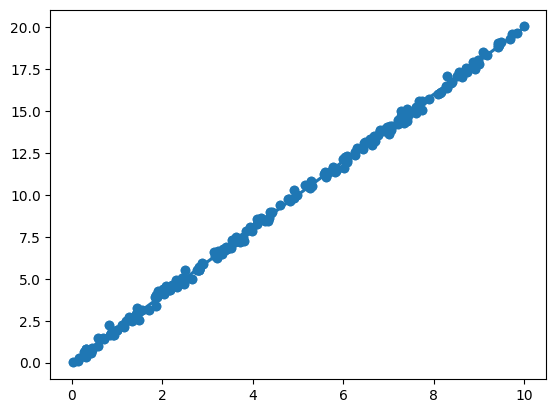

In [79]:
#plotting the data and regression line
plt.scatter(X, y)
sns.regplot(x=X, y=y)

#plt.gca().set_xlim([]).set_ylim([])

In [80]:
#doing 80% test train split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=41)

In [81]:
#make and train model on data with no outlier
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
#see mse and mae of model with no outlier
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("initial mse=", mse)
print("initial mae=", mae)

initial mse= 0.04833653159002933
initial mae= 0.1708582525872792


In [86]:
#make data with outliers
X_train_outlier = np.append(X_train, [11, 12]).reshape(-1, 1)
y_train_outlier = np.append(y_train, [100,500]).reshape(-1, 1)

<Axes: >

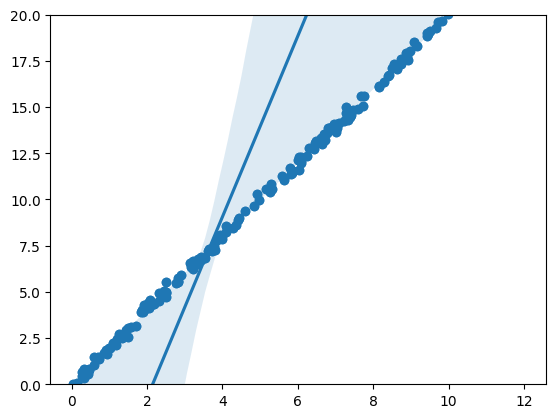

In [89]:
#plot data and regression line
plt.scatter(X_train_outlier, y_train_outlier)
plt.gca().set_ylim([0, 20])
sns.regplot(x=X_train_outlier, y=y_train_outlier)

In [91]:
#make and train model on data with outliers
model_outlier = LinearRegression()
model_outlier.fit(X_train_outlier, y_train_outlier)

LinearRegression()

In [92]:
#see mse and mae of model trained on data with outliers
y_pred_outlier = model_outlier.predict(X_test)
mse_outlier = mean_squared_error(y_test, y_pred_outlier)
mae_outlier = mean_absolute_error(y_test, y_pred_outlier)
print("mse_outlier = ",mse_outlier,"\nmae_outlier = ",mae_outlier)

mse_outlier =  74.95454964404678 
mae_outlier =  7.2316695867746885


## Mean Squared Error is much more sensitive to outliers than Mean Absolute Error 
## Now we use Lasso and Ridge regularizations

In [94]:
#make L1 norm Lasso model and train on data with outliers
model_lasso = Lasso()
model_lasso.fit(X_train_outlier, y_train_outlier)

Lasso()

In [95]:
#see mse and mae of Lasso model trained on data with outliers
y_pred_lasso = model_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print("mse_lasso = ",mse_lasso,"\nmae_lasso = ",mae_lasso)

mse_lasso =  69.77829046817672 
mae_lasso =  6.9594425138740945


In [96]:
#Make L2 Norm Ridge Model and train on data with outliers
model_ridge = Ridge()
model_ridge.fit(X_train_outlier, y_train_outlier)

Ridge()

In [97]:
#see mse and mae of Ridge model trained on data with outliers
y_pred_ridge = model_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print("mse_ridge = ",mse_ridge,"\nmae_ridge = ",mae_ridge)

mse_ridge =  74.7952054125193 
mae_ridge =  7.223458510413576


## Lasso model is less sensitive to outliers